In [1]:
%matplotlib inline
from matplotlib.pyplot import imshow
import PIL.Image
from PIL import ImageChops
import math
import numpy as np
from io import BytesIO
import base64



from PIL import ImageDraw
from IPython.display import Image, display

In [2]:
path_one = '/home/sheeba/notebooks/5.png'

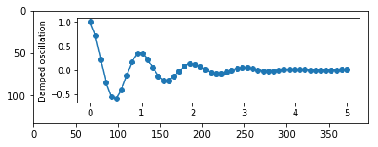

In [3]:
image_one = PIL.Image.open(path_one)
# imshow(image_one)
data='iVBORw0KGgoAAAANSUhEUgAAAY0AAACFCAYAAACng6QIAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAHVlJREFUeJzt3Xl8VPW98PHPN5OBDGvCKgQSQBG3qCRxu/hcNyxoXRBtlVaf2tte+7otXq/tpQ/Ya9E+z72guN7H9ipVW3tbW21FxBUXBOpaCGFRZBMBGVDWsCZkme/9Y05ilpnJSWbOnEnyfb9e85qcMyfn9z1Zzvec33J+oqoYY4wxbmT5HYAxxpiOw5KGMcYY1yxpGGOMcc2ShjHGGNcsaRhjjHHNkoYxxhjXLGkYY4xxzZKGMcYY1yxpGGOMcS3b7wBSbcCAATpixAi/wzDGmA6lrKxsj6oObG07X5OGiDwJXAHsUtXTYnwuwMPA5cBR4GZVXZFonyNGjGD58uVtjmV+eZg5C9ezo6KSobkhpk0Yw6Sx+W3ejzHGdEQistXNdn5XT/0WmJjg88uA0c7rFuC/vAhifnmYGfPWEK6oRIFwRSUz5q1hfnnYi+KMMabDcpU0RCQgIkNFpKD+lYrCVXUpsC/BJlcDv9OoD4BcERmSirIbm7NwPZU1dU3WVdbUMWfh+lQXZYwxHVqr1VMiciswE/gSiDirFTjdw7jq5QOfN1re7qzb2SzGW4jeiVBQ0PZ8tqOisk3rjTGmq3LTpnEbMEZV93odTHup6lxgLkBpaWmbn/U+NDdEOEaCGJobSj44Y4zpRNxUT30OHPA6kDjCwPBGy8OcdSk1bcIYQsFAk3WhYIBpE8akuihjjOnQ3NxpbAYWi8jLwLH6lar6gGdRfWUBMFVE/gScAxxQ1Z2tfE+b1feSunfhOnZUVJGTncWsyUXWe8oYY5pxkzS2Oa9uzitlROSPwIXAABHZTrTtJAigqo8CrxDtbruJaJfb76ay/MYmjc1n0th87nltHY8t+ZRzRvXzqihjjOmwWk0aqno3gIj0cpYPp6pwVZ3SyucK/ChV5bkx5awC/mvxpzy7bDu3jR+dzqKNMSbjtdqmISKniUg58DHwsYiUicip3ofmj4L+PfhfowfwzLJt1EVs/nRjjGnMTUP4XODHqlqoqoXAT4BfexuWv6acXcCOA1Us2bDL71CMMSajuEkaPVX17foFVV0M9PQsogxw6SmDGdCrO09/+HnrGxtjTBfiJmlsFpE7RWSE8/o3oj2qOq1gIItvlA5j0bov2XnABvgZY0w9N0njH4CBwDznNdBZ16lNOauAiMKzy7b7HYoxxmQMN72n9gP/nIZYMkrjBvGpF59AIEv8DskYY3wX905DRB5y3l8UkQXNX+kL0T/fsgZxY4xpItGdxn877/elI5BMNP6UwfTqHuCHv1/BsdqIzbNhjOny4iYNVS1zvjxTVR9u/JmI3AYs8TKwTPDy6p1U1USodcZr1M+zAVjiMMZ0SW4awr8TY93NKY4jI81ZuL4hYdSzeTaMMV1Z3DsNEZkCfAsY2awNozeJJ07qNGyeDWOMaSpRm8Z7RCc7GgDc32j9IWC1l0FlCptnwxhjmkrUprEV2Aqcl75wMsu0CWOYMW9Nk6lgbZ4NY0xX5uaBheeKyDIROSwi1SJSJyIH0xGc3yaNzWfW5CKO65MDQN9Qts2zYYzp0tw0hD8CTAE2AiHg+8AvvQwqk0wam88Hd1xCfm6I808YaAnDGNOluUkaqOomIKCqdar6G2Cit2FlnuLCPMq27vc7DGOM8ZWbpHFURLoBK0XkXhG53eX3dSolBbl8cbDKek4ZY7o0Nyf/m4AAMBU4AgwHrvUyqExUXJgHYHcbxpguzc0DC7c6X1YCd3sbTuY6eUgfcoJZlG3dz5VnDPU7HGOM8UWiwX1rgLjznarq6ckWLiITgYeJ3sk8rqqzm31+MzAHCDurHlHVx5Mttz2CgSxOH5ZL+Ta70zDGdF2J7jSu8LJgEQkQ7YV1KbAdWCYiC1R1bbNNn1HVqV7G4lZJYR6/XrqZqpo6coIBv8Mxxpi0a21wn5fOBjap6mYAEfkTcDXQPGlkjOKCPGojyurtBzh7ZD+/wzHGmLRLNJ/GIRE5GON1KEWD+/KBxpNwb3fWNXetiKwWkb+IyPAUlNtuxQW5gDWGG2O6rrhJQ1V7q2qfGK/eqtonTfG9CIxw2k/eAJ6KtZGI3CIiy0Vk+e7duz0Lpn+v7owc0JMV1q5hjOmiEt1p9HHe+8V6paDsMNHuu/WG8VWDNwCquldVjzmLjwMlsXakqnNVtVRVSwcOHJiC0OIbW5DLiq37UY3bR8AYYzqtROM0nnbey4DlzntZo+VkLQNGi8hIZ/DgDUCTaWRFZEijxauAT1JQblJKCvPYe6SabfuO+h2KMcakXaKG8Cuc95FeFKyqtSIyFVhItMvtk6r6sYj8AliuqguAfxaRq4BaonN43OxFLG1RXPDVIL/C/j19jsYYY9Kr1cF9InINsEhVDzjLucCFqjo/2cJV9RXglWbrft7o6xnAjGTLSaUTB/emV/dsyrbuZ3LxML/DMcaYtGo1aQAzVfX5+gVVrRCRmUDSSaMjCmQJZw7PZcW2Cr9DaZP55WHmLFzPjopKhuaGmDZhDJPG5sddb4wxsbhJGrHaPdx8X6dVXJjHI4s2cvhYLb26Z/6PYn55uMlkUuGKSmbMW8Oyz/byXHmYqppIk/WAJQ5jTExuHli4XEQeEJHjndeDRBvDu6ySwjwiCqs+7xh3G3MWrm8y+yBAZU0df/jb5w0Jo/H6OQvXpzM8Y0wH4iZp3ApUA884ryrgR14GlenOHN6xBvm19XHu9vh3Y0w8bp5yewSYDg3Pi+rprOuy+oaCnDi4V4cZ5Ne/Vzf2HK5usT4gQl2M8SZDc0PpCMsY0wG5mSP8aRHpIyI9gTXAWhGZ5n1oma24II8VW/cTiWT2IL/K6jpUFWm2PhQMMOWc4YRiPHjxnFH2XC1jTGxuqqdOUdWDwCTgVWAk0YmZurTiwjwOVtWyec9hv0NJ6P7X17P3SA0/vOh48nNDCJCfG2LW5CL+36QiZk0ualg/NDeHU4f24fnyMK+u2el36MaYDOSm609QRIJEk8YjqlojIpl9eZ0G+49Eq3vGP7CU/Aztqrpi236eePczbjy3gGkTTmLahJNabDNpbH6TuCur6/j24x8w9ekV5PXsxt7D1dYV1xjTwM2dxmPAFqAnsFRECoFUPOW2w5pfHuahNzc0LNd3VZ1fHk7wXel1rLaOn/5lNUP65PB/JrZMFvGEugW4tngYEYU9h6tRMvP4jDH+aDVpqOp/qmq+ql6uUVuBi9IQW8aKdmHN7K6q//+tTWzadZj/mFxE75xgm773V4s/bTFlY6YdnzHGH24eI9IXmAn8vbNqCfAL4ICHcWW0eF1S/e6q2nh0twJnFeZx4ZhBbd5Pph6fMcZ/bqqnngQOAd90XgeB33gZVKaL1yXVz66q9aO+w07CAFiz40C7qpQy8fiMMZnBTdI4XlVnqupm53U3MMrrwDLZtAljWnRVDQUDTJswxqeIYo/6rqqJtKtKKdbxBUR8Pb72ml8eZtzsRYyc/jLjZi+ydhljkuSm91SliJyvqu8AiMg4oEvXU9T3IpqzcD3hikq6ZWcxa3KRr72LUlml1Pj4dlRU0qt7NoeO1ZKf17HuNOI9c6uePajRmLaT1magE5EzgN8BfZ1V+4HvqOpqj2Nrl9LSUl2+PBVzRLlz14KPeWbZ56y+62sEA25u3LwxbvYiwjESRH5uiHenX5zUvo9W1zL+/iXk9ujGi7eeTyCr+VDBzBTvZ9IjmEVtBKrrvurMEAoGfE/8xvhJRMpUtbS17dz0nlqlqmcApwOnq+rYTE0YfigpzKOypo51Ow/5Gse0CWNanMxTVWXWo1s2P/v6KazdeZCn/7Yt6f2lWqwqqPJt+2MmDICjNZEmCQOsd5gxbrl+rrczKtw0U1JYP5PfPoqG9W1la+9cVnQcM+athoBQVRNJeZXL5UXHcd6o/tz/+nquKBpCXs9uKdlvsmJVQf342ZVEFARadB1OJFxRye/e/4zHlnxm1VbGxJH5k0FkuKG5IYb0zaFsWwU3j/MvjjfX7qKyJsJT/3A2F5w4MOX7FxHuvvpUJjy4lHH3LKKyui4jTqqxOgBEFPqGsrnjspO568W1TT4PBQPkBLPYf7Qm5v5+/sLahq878vwiNumW8YoljRQoLsyjbMs+X2N4dvnnDO2bw/knDPCsjLU7DpKVJRytbtmw7NeJJ15D/8HKWq4/u4DuwUCLkyTQ5O4EoskkGBAOVtU22U99tVWmnlhjJQEgZgeA5Vv38VxZ2DoGmKTETRoiMjnRN6rqvGQLF5GJwMNAAHhcVWc3+7w70Ub4EmAvcL2qbkm23FQrKcjj5dU7G/7h0m1HRSVLN+7m1otO8LSRes7C9dQ1e6qv3yfV3B7BmHcN9b+H5s/Waqz5SfL2Z1bG3G5HRWVGXqHHqpr71z+vIkuguq7l7+n3H7Rsj6qsqeOuBR9zrDYSM5n4eYyJfuZtvZPqLHdemXAcie40rnTeBwF/Byxyli8C3gOSShrO3By/BC4FtgPLRGSBqq5ttNn3gP2qeoKI3ADcA1yfTLleKB0RbddYsW2/L0njubLtqMJ1JcM9LSfTRoo/+c5n7D9aQ5ZEq6TquekAECuZ1Hehbk6Bn/x5VUPCTPdJtfkJ4V8vPZGRg3px5/yPWlTN1bbjUf0VlS2TbuOOAV6fjNpyt1Sv+WfT563m3U/38OLKHVTVRpqs//CzvcwvDzc8+sfNnVcqE1B7TvSpuoP04u/TTZfb14l2sd3pLA8BfquqE5IqWOQ84K76/YjIDABVndVom4XONu+LSDbwBTBQEwSd7i63ADV1EYruWsiUswuYeeWpaS07ElEuvG8x+bkh/njLuZ6W5WW3Xjca/yP17J7N4WO1TDh1MONPHsxDb25M+sTW/ModICeYhSocq4202D4dxx0rpvaKN+lWIsGAUNPorqVx1+RUnCQhdlVhvHanUDBARDXm7yNVBvbuzg8vPJ57XlvXZDrkUDDAtSX5TU7QqVyfE8zijstPpro2Oii38TEGA0IwkNVQNdxYvA4fbf37dNvl1k3S+ERVT260nAV83Hhde4jIdcBEVf2+s3wTcI6qTm20zUfONtud5U+dbfbE268fSQPg+sfep6qmjhemnp/Wct/7dA/f+vWHPHT9mZ5f9cY6gWUJ3P+NM7imeFjayw5kCXOuPZ3JJakrO9aJ7fZnVsb8pxTgs9lf97Ts/3jlE3YdOtZi27weQXKCAXYeqGrxWW4o2KS6CRKfwBJ1DIglt0eQ740byS8Xb0rypJpFt+wsDlQ2bUfqiOKduNvagy+V2vr36TZpuGkIf8u54v+js3w98KbrSNJARG4BbgEoKCjwJYaSwjzmLt1MZXUdoW4tZ8Pzyp+Xb6d3TjYTTzvO87KajxTvEwpyoLKmXVUibRWrl1RdRLn/jQ0pTRptqbbqlp3F6u0VbN59JOkqnFjtE7c/u5J413QVR2t48PpTY16l33XVqQ1xN4+ptLCf66v9eHc3FUdruP+NDS3WV9bU8YcPtsV8QnLs9ZEWT4tuTb5T/Rvr9xHvTqqt6/v17Ma+Iy2nR04k3n9AOhJGQKAuRkFeVZW7mSN8qohcw1dPuZ2rqs+noOww0LgSfpizLtY2253qqb5EG8SbxzgXmAvRO40UxNZmJYV51EaUVdsrOHdU/7SUebCqhlfW7OS6kmHkxJi21QuNT6qRiHLD3A/4vy+t5YITBzKoT45n5frZnjJtwpgWJ9VgQAgIXPXIu03aVNz0SIp1R3HPa+tanKRVQYSYiWNobqhFEm+esGIlrrZ0DIiXLAf17h7z7gdSd/KMd7eUKMmlquro51ecEvfYU5WY4q1PlBTbegfp1bPi3Ha5XQEcUtU3RaSHiPRW1WSHQC8DRovISKLJ4QbgW822WQB8B3gfuA5YlKg9w0/FBfWD/PanLWksWLmDY7URrj/L2wbweLKyhNnXFnHZw3/lzhc+4tEbSxBJfe+tSEQJdQvErM9NR8eDeCfnS04exN/NXsShGN10f77gI2pq1VWjZf1gxFhUW171Nz4hJEoCbT3GWPuJdXK+4/KTU3ZSjXciTHS3VM/tnVR71sc7di/bNFpLim29g/SqutpNm8Y/Eq366aeqx4vIaOBRVb0k6cJFLgceItrl9klV/XcR+QWwXFUXiEgO8N/AWGAfcIOqbk60T7/aNAAuuX8xI/r35Imbz/K0nPor1XBFJdlZwpzrTve8TSGRR5d8yuxX1/GrbxdzedGQlO5bVbnzhY/4/QfbyM6SJlVhmfC8qJHTX05JFUSixsz6q34/uoUmatROxUl11uQiIDPHiGRa7ymvfyapbAhfCZwNfKiqY511a1S1KCWRppifSeOnf1nF62u/pPzOSz254obYDcJ+nzxr6yJcOGcxOw5UokrSf+SN/2F6dA9w5FgdP7hgFCcN7s19r2/IqJNLvB5l7RHrjsLvpJhIZx8T0dWksiH8mKpW158EnbaFjKwi8ltJYR7PLt/O5j1HOH5gL0/KiNUg7PcAu5dW72T34WMx6/WTbRA+cqyOQJZw0uDeXFM8zNc7qlhitXck6pGUqC7bzzuK9ohXpdXW9aZjcZM0lojIHUBIRC4Ffgi86G1YHVPDwwu37PcsaWTaADugRZ9yaH8ii9dL6r7XN2RcwoD47R3Qtjrx+gRhJ1WT6dwkjelER2avAX4AvAI87mVQHdWoAb3oGwpStnU/3/SocXpobihmdYifU7GmMpFlYlJsTVt6JKW70dKYVHPT5TYiIk8BHxKtllqfqT2Y/JaVJZQU5lG2bb9nZUybMIafPLuqSRWH31PNxktk2QHhiwNVHNfXXVfcN9Z+GbdFuCPOT27VNKYzajVpiMjXgUeBT4n+S48UkR+o6qteB9cRlRTmsWjdLiqOVpPbI/VzTow/ZTAiSs9gtAtqJlypxqrX7xbIApSrHnmHG88t4Jll2xM2jNY3eA/LzWH34eom1V1+J0VjzFfcVE/dD1ykqpsAROR44GXAkkYM9eM1yrdVcNFJg1K+/1fX7KQ2As9875yGNhS/xavXP2lIb2547AMeeGNjw7b1D5FbunEXL6/+oiE51Dd4/8v4E8kOZFn1jTEZyk3SOFSfMBybAX/nNs1gn+87AsB3f7usoUdMKk94z5eHGdG/B8UFuSnbZyrEq3LJCQag2VNUq2oizFuxo8W2dRHlwTc38u70iy1JGJOh3CSN5SLyCvAs0drmbxB9jPlkSM28Gp3F/PIwMxd4N/PbjopK3t+8l9suGe3ZOJBU+/JgywfqJZLJDd7GGMhysU0O8CVwAXAhsBsIEZ1v4wrPIuuAEo2hSIX5K8OowjUd6Co8XgN2IE7S64gN3sZ0JW56T303HYF0Bl52F1VVnl8RpqQwj8L+PZPeX7rEG/yW7oesGWNSw03vqZHArcCIxtur6lXehdUxeTmG4uMdB9m46zD/fs1pSe8rnRI9idXGKxjT8bhp05gPPEF0FLh302V1ArGuqnOCWSm5ep63Iky3QBZXFA1Nel/pZuMVjOk83CSNKlX9T88j6QSaX1UrcOUZQ5M+MdbWRViwagcXnzSIvj2CKYjUGGPax03SeFhEZgKvAw0zr6jqCs+i6sDqr55Vla89uJTNu48kvc+/btrDnsPHuKbYrsqNMf5ykzSKgJuAi/mqekqdZROHiHBNcT73vraerXuPJNV4/fyKMLk9glw0JvWDBY0xpi3cdLn9BjBKVS9Q1YuclyUMFyadmY9IdEBee8wvD3PerLdYsGoHNbURXlmzM8URGmNM27hJGh8BmTX8uIMYmhvivFH9eb48TFuf8Vg/r8TOA9HBcUeq65gxbw3z25mAjDEmFdwkjVxgnYgsFJEF9S+vA+ssJhcPY+veo6xo45NvvR4oaIwx7eGmTWOm51F0YhNPO45/m7+G51aEKSns5/r7OuK8EsaYzs/NiPAlqS5URPoBzxAdMLgF+KaqtrgUF5E6opM/AWzriAMKe3XPZsKpx/HSqh3MvPIUumcHXH3fcX1zGqqmGrPHbBhj/NRq9ZSInCsiy0TksIhUi0idiBxMstzpwFuqOhp4y1mOpVJVz3ReHS5h1JtcPIyDVbUs+mSX6+85bWifFuvsMRvGGL+5adN4BJgCbCT6oMLvA79Mstyrgaecr58CJiW5v4w27vj+DOzdnXkuG7G37DnCkg17KC3MJT83hAD5uSFmTS6yEdTGGF+5adNAVTeJSEBV64DfiEg5MCOJcgeran3/0S+AwXG2yxGR5UAtMFtV5ydRpm+yA1lMOnMov3l3C/uOVNOvZ+IZ/X7x0lq6ZWfxq2+XMKiPu6lSjTEmHdwkjaMi0g1YKSL3AjtxV631JnBcjI9+1nhBVVVE4vVHLVTVsIiMAhaJyBpV/TRGWbcAtwAUFBS0Fpovrhk7jF//9TMuum8xBytr4j6g761PvmTRul387PKTLWEYYzKOm6RxE9EkMRW4HRgOXNvaN6nq+HificiXIjJEVXeKyBAgZmW/qoad980ishgYS3Su8ubbzQXmApSWlrZtQESabPjyEAIccGaxizVBU1VNHXe/uJYTBvXi5nEjfIrUGGPic9N7aquIDHS+vjtF5S4AvgPMdt5faL6BiOQBR1X1mIgMAMYB96ao/LSbs3A9zbNZ43EXcxaub3is+j9dcDzBgJvmJmOMSa+4ZyaJuktE9gDrgQ0isltEfp6CcmcDl4rIRmC8s4yIlIrI4842JxOdanYV8DbRNo21MffWAcQbXxGuqGT6vNVN5uH47XtbbOS3MSYjJbqcvZ3o1f1ZqtpPVfOAc4BxInJ7MoWq6l5VvURVR6vqeFXd56xfrqrfd75+T1WLVPUM5/2JZMr0W6LxFVU1TacpsZHfxphMlShp3ARMUdXP6leo6mbgRuB/ex1YZzNtwhhCwaYD+0LB+D9+G/ltjMlEiZJGUFX3NF+pqrsBmwmojSaNzWfW5KJm4y5OJz/OHYiN/DbGZKJEDeHV7fzMxBFvetPmU8TayG9jTKZKlDTOiPO4EAFsAEGKNJ8iNt74DWOMyQRxk4aqunuynklavDsQY4zJNNLWyYEynYjsBrYmsYsBQIu2nE6uqx1zVztesGPuKpI55kJVHdjaRp0uaSRLRJaraqnfcaRTVzvmrna8YMfcVaTjmG3YsTHGGNcsaRhjjHHNkkZLc/0OwAdd7Zi72vGCHXNX4fkxW5uGMcYY1+xOwxhjjGuWNIwxxrhmScMhIhNFZL2IbBKR6X7H4zUReVJEdonIR37Hki4iMlxE3haRtSLysYjc5ndMXhORHBH5m4isco45VXPiZDQRCYhIuYi85Hcs6SIiW0RkjYisdKbJ9qYca9OI/oEBG4BLge3AMqJP+O2w83e0RkT+HjgM/E5VT/M7nnRwZokcoqorRKQ3UAZM6uS/ZwF6quphEQkC7wC3qeoHPofmKRH5MVAK9FHVK/yOJx1EZAtQGutBs6lkdxpRZwObVHWzqlYDfwKu9jkmT6nqUmCf33Gkk6ruVNUVzteHgE+ATv38Fo067CwGnVenvlIUkWHA14HHW9vWtJ0ljah84PNGy9vp5CeTrk5ERhCdc/5DfyPxnlNVsxLYBbyhqp39mB8CfgpEWtuwk1HgdREpE5FbvCrEkobpckSkF/Ac8C+qGutJzp2Kqtap6pnAMOBsEem01ZEicgWwS1XL/I7FB+erajFwGfAjpwo65SxpRIWB4Y2WhznrTCfj1Os/B/xBVef5HU86qWoF8DYw0e9YPDQOuMqp3/8TcLGI/N7fkNJDVcPO+y7geaLV7ilnSSNqGTBaREaKSDfgBmCBzzGZFHMahZ8APlHVB/yOJx1EZKCI5Dpfh4h29ljnb1TeUdUZqjpMVUcQ/T9epKo3+hyW50Skp9O5AxHpCXwN8KRnpCUNQFVrganAQqKNo8+q6sf+RuUtEfkj8D4wRkS2i8j3/I4pDcYBNxG9+lzpvC73OyiPDQHeFpHVRC+O3lDVLtMNtQsZDLwjIquAvwEvq+prXhRkXW6NMca4ZncaxhhjXLOkYYwxxjVLGsYYY1yzpGGMMcY1SxrGGGNcs6RhjDHGNUsaxhhjXPsfoMVEFRCSX8UAAAAASUVORK5CYII='


image_one = PIL.Image.open(BytesIO(base64.b64decode(data)))
imshow(image_one)



In [4]:
path_two = '/home/sheeba/notebooks/6.png'

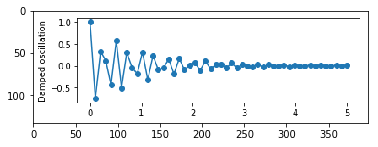

In [5]:
# image_two = PIL.Image.open(path_two)
# # imshow(image_two)

# image_one = PIL.Image.open(path_one)
# imshow(image_one)
data='iVBORw0KGgoAAAANSUhEUgAAAY0AAACFCAYAAACng6QIAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAIABJREFUeJztnXt8XHWZ8L9PJpNk0iaZtuklSVt6oRQovWHBRVzlpgXEUsH7u3hZfbu7ynpBq+Duiri+gvb1tuu+ryKrK+yqKGApF61gBVZAoKVpa0sLpektSS9pO0maTm6TZ/84M8lkcmbmTDqXNHm+n8/5JOfMOed5JpP5Pef5PZefqCqGYRiG4YWiQitgGIZhnDmY0TAMwzA8Y0bDMAzD8IwZDcMwDMMzZjQMwzAMz5jRMAzDMDxjRsMwDMPwjBkNwzAMwzNmNAzDMAzPFBdagWxTXV2ts2bNKrQahmEYZxSbNm1qUdXJ6c4rqNEQkR8D1wFHVPUCl9cF+B5wLXAK+IiqvpzqnrNmzWLjxo0Z67J2cyNr1u+iKRSmNhhg9fL5rFxal/F9DMMwzkREZJ+X8wo9PfUfwNUpXr8GmBfdVgH/PxdKrN3cyG0PbaMxFEaBxlCY2x7axtrNjbkQZxiGccbiyWiIiE9EakVkZmzLhnBVfQY4nuKU64F71eFPQFBEarIhO54163cR7okMOhbuibBm/a5sizIMwzijSTs9JSJ/D9wOHAb6oocVWJRDvWLUAQfi9g9GjzUn6LgKxxNh5szM7VlTKJzRccMwjLGKl5jGp4H5qnos18oMF1W9G7gbYNmyZRn3eq8NBmh0MRC1wcDpK2cYhjGK8DI9dQBozbUiSWgEZsTtT48eyyqrl88n4PcNOhbw+1i9fH62RRmGYZzRePE09gBPichjQFfsoKp+O2daDbAOuFlEfgG8EWhV1eY012RMLEvqc7/cQkSVOsueMgzDcMWL0dgf3UqiW9YQkZ8DlwHVInIQJ3biB1DVHwCP46Tb7sZJuf1oNuXHs3JpHXc/s4faYBn3fPiiXIkxDMM4o0lrNFT1DgARGR/dP5kt4ar6gTSvK/DJbMlLR7DcT+hUT77EGYZhnHGkjWmIyAUishnYDmwXkU0isiD3quWfYLmfUNiMhmEYRjK8BMLvBm5R1bNU9Szgc8CPcqtWYagK+Gk1o2EYhpEUL0ZjnKr+Ibajqk8B43KmUQGpCpTQeqoHZ1bMMAzDSMSL0dgjIv8kIrOi2z/iZFSNOoLlfrojfUOqww3DMAwHL0bjr4HJwEPRbXL02KgjGPADWDDcMAwjCV6yp04An8qDLgWnKmo0WsM9Vg1uGIbhQlKjISLfVdXPiMgjOL2mBqGqK3KqWQGoKjdPwzAMIxWpPI37oj//bz4UGQkEA07tYmu4u8CaGIZhjEySGg1V3RT9dYmqfi/+NRH5NPB0LhUrBDFPw9JuDcMw3PESCP+wy7GPZFmPEYEFwg3DMFKTKqbxAeCDwGwRWRf3UgWpF046Yykv8eH3iVWFG4ZhJCFVTOM5nMWOqoFvxR1vB7bmUqlCISJWFW4YhpGCVDGNfcA+4JL8qVN4qgJ+Wm16yjAMwxUvy73+BfCvwHk4rdF9QIeqVuZYt4IQLC8hlOfsqbWbG1mzfhdNoTC1tpaHYRgjGC/raXwfeD/wK2AZ8CHgnFwqVUiCAT+H2jrzJm/t5kZue2hbf+uSxlCY2x7aBmCGwzCMEYeX7ClUdTfgU9WIqv4EuDq3ahWOfMc01qzfNaTXVbgnwpr1u/Kmg2EYhle8eBqnRKQEqBeRb+IExz0ZmzORqvL8xjSaQuGMjhuGYRQSL4P/TThxjJuBDmAGcGM2hIvI1SKyS0R2i8itLq9/RESOikh9dPt4NuSmIhgoob2rl95IX65FASTtcWW9rwzDGImkNRqquk9Vw6rapqp3qOot0emq00JEfMC/AdcA5wMfEJHzXU69X1WXRLd7TlduOqoCjvPV1tmba1EArF4+H79PBh0L+H2sXj4/L/INwzAyIVVx3zZcGhXGUNVFpyn7YmC3qu6JyvsFcD2w4zTve1oEy53+U6FT3UwcV5JzeSuX1rHhlcOs29oMQJ1lTxmGMYJJFdO4Lsey64ADcfsHgTe6nHejiLwFeBX4rKoeSDxBRFYBqwBmzpx5Wkr1d7rNYzB8QtQ4+YqEZ75wOb4iSXOFYRhGYUg6PRWdlkq65Um/R4BZUa/mCeCnSXS9W1WXqeqyyZMnn5bA+DU18kVjNOgd6VNaTnblTa5hGEamJDUaItIuIm0uW7uItGVBdiNOUD3G9OixflT1mKrGRtF7gDdkQW5KYk0L85lB1RjqpMTnfBTNrfmrETEMw8iUVJ5GhapWumwVWaoGfwmYJyKzoym97wfiGyMiIjVxuyuAV7IgNyXxMY180RQKs3B6FQDNlmprGMYIJlUgvFJV20RkotvrqnpanW5VtVdEbgbW46T0/lhVt4vIV4GNqroO+JSIrAB6cTrrfuR0ZHqhssz5k+QrpnGyq5fWcA9vOGsCm/adME/DMIwRTapA+M9wguGbcLKo4qOzCsw5XeGq+jjweMKxL8f9fhtw2+nKyYRiXxEVpcV5i2nEivgW1FZSWlyU1xYmhmEYmZKqy+110Z+z86fOyMBLVXi2mgzGguDTJwSoqSqzSnDDMEY0XrrcvgvYoKqt0f0gcJmqrs21coUiWO5POT2VzSaDMSNRGwwwraqMQx6mp7LZFdc67BqGkQle2ojcHjMYAKoaAm7PnUqFJ13Twmw2GWw8EcZXJEypKKO2KpA2phEzWI2hMMqAwVq7uTHldbm+l2EYYwMvRsPtHC+NDs9YgoGSlNlT2Wwy2BQKM62yDF+RMK2qjMNtnUT6khbiZ9VgWYddwzAyxYvR2Cgi3xaRudHtOzjB8VFLVXlqTyObTQabQp3UTXCuqwkG6O1TjqUo8Mu2wcrWvQzDGBt4MRp/D3QD90e3TuCTuVSq0ASj01Oq7k/8q5fPJ+Af/KcrLpJhNRlsDIWpixqbmsoyAJpSTFFl02AN515rNzdy6V0bmH3rY1x61wabyjKMMYaXLrcdqnqrqi7D6Q11p6p25F61wlEV8NMTUU51R1xfX7m0ji+947z+/fISH32qLJkRzEhOb6SPQ22d1AYdYzGtyvl5qDX5k76bwRpuV9zVy+eT2OYq1b0sBmIYRlqjISI/E5FKERkHbAN2iMjq3KtWOIIemhYumT4BgB/e9Aae+vxlBPw+vv54ZgXrR9q7iPQpdcFyYOAJP1UwfOXSOj7/9sGD+qeuPHtYGU/XLarBXyQURy3HpHEl3HnDwqT3shiIYRhepqfOV9U2YCXwG2A2zsJMo5aqQPpWIk1Rb6C2KsCUyjI+cfnZ/G7HYZ7b3eJZzkC6reNhTCj3U1JclDaDau6U8QD8v/91IUUCHV3uHlE6Xmlupyui/PPKCxCBD79pVkrjU+gYiE2NGUbh8WI0/CLixzEa61S1hxTrbIwGvHS6jdVTxKaUPvbm2UyfEOCrj+5Imf0UT6ywLxbTEBFqqsrSGo2GFmd28KJZE7n07GrWbWlKGn9JxQsNxwC44twpzJo0ju1NrSnPz/Yqg5kYAZsaM4yRgRej8UNgLzAOeEZEzgKy0eV2xBKbnkpVFd7UGqbEV8Sk6FoYZX4fX7r2PHYeauf+l4Ys+eFKY1xhX4yaqrK0TQsbWjqoKC2menwJKxbXsv/4KeoPhDzJjOeFhuPMmlTO1Moyzq+tZEdz6o919fL5lBYP/pcpLS4aVjwlUyNgU2OGMTLwEgj/F1WtU9Vr1WEfcHkedCsYXmIah1o7mVZVRlFcJPmaC6Yxp3oc/7h2m6en56ZQmGC5n3GlA2UvNR4K/BpaOpg9eRwiwvILplFSXMTD9U1e3x4AfX3KS3uPc/Fspx/l+TWVHDgeTuldrVxax3WLnMbDsXd91XlThhVPydQI2NSYYYwMvATCq6J1Ghuj27dwvI5Ri5fpqeZQZ//UVIyH65toDIXpUzw9PTeFOqmtGjy1UxMt8OtLMcW152gHs6udj6CyzM8V86fw6NZmz9NiAK8dOUnoVA8Xz54EOA0TAXY0pfY2+hSmVJSy585ruWjWBF451D6sqbFMjUC2p8YywabGDGMAL9NTPwbagfdGtzbgJ7lUqtAE/D5KfEWE0kxP1SYYjTXrd9HV2zfoWLqn58RBr6aqjN4UK/h19kRoag33Gw2AFUtqaTnZxfOvH0v5vuKJxTPeGPU0FtQ663mkm6KqPxBiyYwgIsKNF05nz9GOYU2NTaksdT2ezAisXj6/f6GqGMOdGoPMPIdCT42Zl2OMJLwYjbmqeruq7olud5CFtugjGRGJVoW7Z0/19SmH2zqZluAlZPr03HgiTF1wsOGJ3TPZFNX+46dQZZDRuOLcKYwvLWbdFu+DyQsNx6mtKmN6tBp9ckUpkytKUwbDT3R009DSwdKZTrrxtYtqKC0u4sGXD3qWG6N6/FCjkapGZOXSOi6oraRInKkxARbUVA5raixTz6GQU2Pm5RgjDS9GIywib47tiMilwKjvMxFM0bSwpaOLnoj2p8rGyGQKpa2zh/au3v4WIjFqot5LMqOx56iTOTWnenz/sTK/j7cvmMpv/nyIrt706beqyosNTjxDZCAms6C2MuX0VP1Bx6OIFTFWlvlZvmAaj2xp9iQ3xjOvHmV7UxvXLZo2kDkGfPX6BUmNQLg7ws7D7bzvopk03PUOVr11DvUHQ+xtybzONFPPYbhTY8k8hHx4OdnyToZzH/OMRjdeGg/+LXCviFRF908AH86GcBG5Gvgezsp996jqXQmvlwL34qwNfgx4n6ruzYbsdFQF/Emnp5pDzoBek+BprF4+f1DLdEj+9Nzkkjnl3DNmNNztcizddlZ1+aDj1y+p46GXG3lq11GWL5iW9H3F7nG0vas/nhFjQW0lf3ythc6eCGV+35DrNu8PUSSwaHpV/7Eb3zCddVua2PDKEa5ZWDPkmkR6In189dEdnDWpnG+9dwmlxT6e293CB+95YVBCQCIbdh7hVHeEd0YD8R9782x+8uxefvD069x146Kk1yW2fv/MVfP6s9YSSeY53PK2eXz+V1sH5ZmLwOfedk5KuW7t8zfuO86Dmxo9t9UfjpeTrdb9w7lPNpcNGE7b/kIuGzBaZKcjrdFQ1S3AYhGpjO5nJd1WRHzAvwFvAw4CL4nIOlXdEXfax4ATqnq2iLwf+AbwvmzIT0ew3E9TyP1pP+YF1CTENGIf0pr1u2gMhSkS+Pq7Lkg5GCQajYnjSigpLkq6rkZDy0mqx5dSUeYfdPzSuZOYNK6EdfVNaY3Giw3OSr1vnDN4Jd/za6ro7VNeO3yyf83yeOoPhDhnasWgwf3NZ1cztbKUB18+6Mlo3Pf8PnYfOcmPPrSM0mJfVI9JTKko5eH6Rq5Nco9HtzZRPb6UN85xDN2UijLet2wGv3hpP5++at4QAw7uA9jqB7Ym1S2Z59Aa7kVxPpsTHd0Ey/2cONXD4fbkjSWTeQg/e2E/ifkKMc/B7f9kWpK6nZoEL9eL7Jh34nVwSXWf4XYNcJPtNuABWTVYmciOHc/kXqn0LaTsXBgOzy3Os2Us4rgY2K2qewBE5BfA9UC80bge+Er09weA74uI6HDSdTKkKlDCK83trq/FvIBEowHOh7RyaR33Pb+Xf3p4O8tmuS6xTuOJwYV9MdIV+DW0dDCnemjyWrGviGsX1vDLjQc42dXL+BRP7S82HKd6fMmQ+8QyqLY3tQ4xGn19Sv3+E7xjUe2g474iYeXSOv79vxtoOdnlGquIcexkF9958lX+cl41V503ZdA9rltUy3++sI/WcE9/9lqMk129bNh5hPdfNANfXIrzqrfM4Wcv7udHzzTw5XeeP0Se2wAGML7UR6SPQa8lazh5vKOb70Z1vvevL0ZEUFU+8V8v850nXuXycydz7rTKIdcl8wSSJbi5nX+kvTNpZtrE8pKkHmHSGFoozOd+taU/yy7VYPTRS2cl9cgaQ2FUlYfrmwZd8/m3n5Pymi8+uLU/USSV5/XFB7dSJOJqfL7++CuuA+5nrprHXb/Z6XrNP/x6G5E+pdNV9kHCPQPHv/DAVl7ef4KH6xtd7/WVdX+mq1cH6XvrQ1spLipyPf+f1m6jp0/p7Bks+4WGY/z65cZBOn3hga3sPNTGrzYe9Cz7iw9upaTYXXYq4346FHJdjDogvgruIE5DRNdzVLVXRFqBSYD3Xh3DJNVCTIdaOykpLmJitLDPjViwuP5AiBkTy4e83hjqxO8TJrsMstMqy1JOT1157lTX1yaM89PV28cFt6+nLsVT5Asu8QyAmRPLGV9a7JpB1XCsg7bOXpa6NGV894XT+eHTe3i4vomPvXno6sCxL3hsQLl07qQhslcsqeXHzzawfvsh3rtsxqDXntxxmK7ePt65eLDBmjGxnOuX1PLzF/fzycvnMinhb5ls8OzoivCd9y3pH3RK/UV09/Yxb+r4Ied++4lddHRH+PJ15/frLCJ8beUFvLT3GW65fwtrP3kpJXFFj02hMMU+oScydMAvEnfDUT2+dNBAOLWylEif0tEd4ROXzeXh+qb+AfKSORN54OVGPv7TjaxYXMP3fr+bplCYmqoyzq2pSNmuITEtO9wT4YsPbEERuiMDA9jXHkvdR+3Kbz1NYyg8yAjc8sstKa9xyyz8zz/tT3tePEfau7j4/zzB8Y4eeuOMXyoPssOl8Wgy2d2RPu59fl/Se4XCvUOOOQbBXed2lxY/4Z4IP39xaAFwd6SPHzy9JyPZXb19Sf9euUrUGBWLKYnIKmAVwMyZM7Nyz2C5n5NdvfRE+vAnpHo2tXZSU1U2ZOCLZ/60CkqLi6g/EBoy2AHRL3lgUHFgjNpggJf2Hh9yvDXcQ8vJbmZPHupprN3cyI+eGfiHS+aiHjxxisZQmFVvGZoAV1QknFdTwXaXYPjm/U4QfOnMoUZj3tQKFk2v4sFNB4cYjURXG+B7v9/NtKrAIL0WT6/irEnlPLKlaYjReGRLEzVVZVwYNcTxfOKyufx6cyP/8dxePhfXyLGhpQNfkfQPLPHUBgP9HiE43sTV332Gz95fz7qb39z/9L7zUBs/e2E/H7pkFvOmVgy6x6TxpXz9XQtZdd8mbv7ZJrY3tdMUCjNpvOMBFAElPqE7znAE/D5ufEPdoCfrGEdPdg3yAg61OVNfn7rybG5523y+cPW5g86/ZG41n/vVFp59vYWYM9LU2klTaydzq8fR2Bruf7qNyXbzugC6IopbZ6DKsmJ6IjroujJ/Ee9cXMuDmw4OMX4KBPxFKHiWnSnOw1yv6+eazCBnigBTPS69nG0E5wHiaIo1dbySqxqmpNlTInJDqi0LshuB+NFhevSY6zkiUgxU4QTEB6Gqd6vqMlVdNnny5CyoFtdKxMXbaI4+1aXC7ytiYV1V0hqGxlB4SPZVjGlJCvximUKzXaannKmY9DUisXhGrBI8kQW1VbzS3DbkibT+wAkqSouZO3no0zjA2VPGs6O5bUjGjNfsHxFhxeJant3dwpH2gS9r66kennntKNctqnE1sGdPqWBhbSXf37C7X/bXHtvBiu//kRKfDKntcEtMmDiuhDXvWcyrh0/yjd/uBJwMszvW7aAy4OczV81zfc9vXzCNi86awO92HOlPiW052U1HV4Rb3n4O33z3YuqCAQRnGvLOGxbytZULufOGhYOO33XDQsaV+lyLMx/c5J55dOMbpjOx3I/b7FVnbx933bBoiOzEqdB0tHf2uui6iDXvXuwqFxxjkYlsX5IHr2DATyBh6i3g93HHigV0J3my7lNcr5lQ7nc9P5ns2mCAW68+N6N7JdN3OLL/4R3nZUX2cGuY0pHK03hn9OcU4E3Ahuj+5cBzwEOnKfslYJ6IzMYxDu8HPphwzjqcTK3ngXcDG/IRz4DBVeGJ8/TNrZ1JB914lswIct+f9rl7K6Ewb5pb7XpdTVUZPRGlpaOLKRUDhiWWOeUW0/CaZfPCnuNUBfzMT3hyjnF+bSWnuiPsO9bBnDgDsXl/iMUzgq4D99rNjTy+rRkYqIT/4oNbeWLHoYwyla5fUsu/btjN41ub+ciljseyfvsheiLKdYuGemsx2bsOn+x/Tm4MhbnnvxuYHizj56suYdO+E54Cv289ZzIfedMsfvLsXtbVN3Gsw6nRufHCOoLlyachD7q8DwXufX4/z956hauseC8nRnxsIZ5UUwwnkmT3NYXCrjJichKz+8r8Ra73SvTIEl9z+2xTXeMm283zCvh9fGXFAsA9gBw/1RlPbEo2XaA4nez4/xGv90qmbyFl5z17SlU/CiAiv8Npj94c3a8B/uN0BUdjFDcD63FSbn+sqttF5KvARlVdB/w7cJ+I7AaO4xiWvBAzGolpt5FoYV86TwNgycwg9/yxgZ3N7YMCyz2RPg63dQ4p7IsRywQ61No5yGjsaelABGZOGhojSfYlTtTzxb3HuWjWRNfBH5weVADbm9r6jUa4O8LOQ+383Vvnul6zZv2uQdMR4My1PrbtEP4kc/turvPZUyo4r6aSh7c09RuNR7Y2MXNi+aA030TZbnO6ferEPGZMLPf85VlQW4lAv8EAeGxbM385b3LSeySbwsh0PjnVIJytazIdjFI9qWaSXp5K9sqldSw7a2LSAc/t755KdjKDNVzZmdwrmb6Flp1tvMQ0ZsQMRpTDQFYCB6r6OPB4wrEvx/3eCbwnG7IyJfZ0mVgV3nKyi94+pcaDqx8rgqs/cGKQ0Tjc1kmfJv9yxwb6plAni6YPHG9o6WD6hEB/qmo8bl8kgOqKEvr6lKIi4UhbJw0tHXzw4uQf3zlTK/D7hO1Nbf2xmG2NrUT61DWe4ejpPkAKsObdizMaXFYsruUbv93J/mOnGFfq47nXj/E3b5mTNH6UTHa6po9ufPfJ14bM7Hf29KXMQhnOYO9GpoPwcK8ZzmCU7D7Ducar55WKQsoerr6Fkp0LvBiN34vIeuDn0f33AU/mTqWRQTBJ08L+Go3K9J5GXTBA9fhSNh8IcdMlA8dj6bbpjEbisq8NLSeZXe0eU3D7Il00awJr65v45vpd3HrNubyQJp4BUFJcxLwpFYMyqOoPnABIupxtuqmKRL1SfcHfubiGb/x2J49sbaIq4CfSp66JBF5kZ8pwCumGM3C7MdyBMNNrUt3rTBrARsLgOVbxUtx3s4i8C3hL9NDdqvrr3KpVeJJNT8XWukhVXBVDRFgyIzgkGB5b9S+xhUiMieNKKPEV0dw28LSsqjQc7WDZWckH/MQvkqoyrrSYHzz9Oic6unh0q+Mw/t1/beILy89N+qU7v7aSp3YdQVURETbvDzFzYvmQlNYY6QbOTL7g0yeUM3tSOd954lV6+5TiImFncxvn1QythfAiOxOGY4DG8sBtjE28pty+DLSr6pMiUi4iFarqXvk2SqhMZjRa3VuIJGPpzCBPvnKY1lM9VEWzH2KV5olt0WOIiFMJHFeRfvRkFx3dEdfMqWSICF9ZsYCNe49z/8aBpoJNoc6UFaMLait5YNNBjrR3MbWyjPoDIS5KUqQYf49sDJxrNzdyMBTuT6ns7VO+9Os/IyJJXfxsyR6uAbKB2xhLpDUaIvK/cWogJgJzcQrufgBcmVvVCouvSKgsK3aZngpTWlyUNP0tkf64xsEQbz3HSQduDIWZOK6EQMnQ2ESMmoQ88YajydNtU+H3FdHWObQoKFXFaH+b9KY2VB1DmSyeESNbA+ea9buGBM7TVbdmS3Y2DZBhjFa8eBqfxGn58QKAqr4mIlNSXzI6cNqjDzYaTa2d1AYDKQv74lk0vQoRqN8fZzROJK/RiFFTVcbGfSf69xtS1GikI9MMn/NqnHTc7U2t/d1rk8Uzsk2hV+gzr8EwUuOlNXqXqvanEEWL7PJSK1FogoESQqcGZ08dau1kmocgeIyKMj9nTx7fH0wGZwBMV2g1rSowqMCvoaWDkuKiYQV4M23tXVHm56xJ5WxvamPzgRAlviLOr3WPKWSbQq7QZxhGerwYjadF5EtAQETeBvwKeCS3ao0MguX+IeuEN4fCnoLg8cSC4aqKqrqu2JdIbdAp8IvVDOxp6eCsieWDGvZ5ZfXy+RlXjC6orWRHcxub94c4v7bSNc03FwxHV8Mw8ocXo3ErcBTYBvwNTl3FP+ZSqZFCYtPCSJ9yuL3LU2FfPEtnTuDEqR72Hz9FW7iXju5Iek+jcvC6Gg0tHcOamgJnyiWxHcSdNyxMOQ2zoLaKfcdOsSW6vGu+GI6uhmHkDy8pt30i8lOcmIYCu/LVyqPQVAX8tMZlTx1t7yLSp54zp2IMFPmFOHuKU2eR3tMYWPZ1Qa2y71gHV543/FBSpnP1rdFpua7ePh6ub2TJjGDeBm6LKxjGyMVL9tQ7cLKlXscp8p0tIn+jqr/JtXKFJjY9FatXiNVXpAtiJ3LO1PEE/D427w9RXuL8ydPHNGIFfp00ngjTE1HXnlO5YO3mxkHtoU+c6snpoi6GYZw5eJme+hZwuapepqpvxWlY+J3cqjUyCAZK+tc0gIEspGmVmXkaxb4iFk53Ot4mW7EvkYnlToFfU2uYPS0nAZJWg2ebNet39S8OE8PLutSGYYx+vBiNdlXdHbe/BxjVhX0xBqrCnamagQE/M08DYOmMIDua2vqzoCalWMAJnLUtpkVrNU4n3XY4FDrt1TCMkYuXOo2NIvI48EucmMZ7cNbzvgFAVU+3RfqIJVbBHTrVw/QJTnyhzF80ZDlSLyyZEaQ70sfvdx6mLui++FIisarwqkAHFaXFVI9PbWiyRTb7ORmGMbrw4mmU4XS2fStwGU4mVQBnvY3rcqbZCCDWtLAtmkF1qLWT2irvhX3xLIlWVB84nr6wL0ZNVRnNbWEnc2ryuGHJHQ6W9moYRjK8ZE99NB+KjET6PY2o0WhqzbxGI0ZNVYDKMh9tnRGe3X2MS+/akLZFRU1VgMOth4hElIs8LPqULaydhmEYyfCSPTUb+HtgVvz5qroid2qNDIIBZzoo1rTwUGtn0tX20rF2cyMn4xaZT7aGdzw1VWV0R/poau3MWzwjhqW9GobhhpeYxlqcFfQeAdwX5x2lBPs9jW4Yp43BAAAG80lEQVR6o6vtDScIDs5Te+IS0Oka8cUXEebbaBiGYbjhxWh0quq/ZFOoiEwE7sfxXvYC71XVEy7nRXAq0QH259u7KfP7KC0uojXcw5H2LvrUe0v0RIaTkRQva06e0m0NwzBS4SUQ/j0RuV1ELhGRC2Pbacq9Ffi9qs4Dfh/ddyOsqkuiW0Gmw2JV4QPraAzP0xhOI77NcU0OV923kbWbG4cl2zAMI1t48TQWAjcBVzAwPaXR/eFyPU4mFsBPgaeAL57G/XJGsNxP6FRPfw+o4QbCM13gZ+3mRu58/JX+/ebW1AsnGYZh5AMvRuM9wJz49uhZYKqqNkd/PwRMTXJemYhsBHqBu1R1rdtJIrIKZ6EoZs6cmUU1nWB4a7infxW9mgyrwWNkmpG0Zv0uwj3uVdlmNAzDKBRejMafgSBwJJMbi8iTwDSXl/4hfkdVVUSSNUA8S1UbRWQOsEFEtqnq64knqerdwN0Ay5Yty2ozxcqAn8ZQmObWTspLfFQGvK6QO5RMMpKsKtswjJGIlxEwCOwUkZeArtjBdDEGVb0q2WsiclhEalS1WURqSGKQVLUx+nOPiDwFLMVpnJg3guV+djS10twapqaqLG8FdlaVbRjGSMSL0bg9B3LXAR8G7or+fDjxBBGZAJxS1S4RqQYuBb6ZA11SEoyuqdHc2jnszKnhkGkMxDAMIx94qQh/Ogdy7wJ+KSIfA/YB7wUQkWXA36rqx4HzgB+KSB9OltddqrojB7qkJFjup6M7woHjp7ji3PwtjW5V2YZhjES8VIT/BfCvOIN4CeADOlR12ItGq+ox4EqX4xuBj0d/fw4nc6ugxJoTHuvoHna67XCxqmzDMEYaXuo0vg98AHgNp1Hhx4F/y6VSI4mq8oHOsjUWTzAMY4zjxWgQXU/Dp6oRVf0JcHVu1Ro5BOPaoOfb0zAMwxhpeAmEnxKREqBeRL4JNOPR2IwGqgYZDfM0DMMY23gZ/G+Knncz0AHMAG7MpVIjiVjTQhh+NbhhGMZoIa3RUNV9QAVQqqp3qOotCcu/jmqe3d3S//s1333G+j8ZhjGmSWo0xOErItIC7AJeFZGjIvLl/KlXWNZubuSfHx3I8m0MOf2fzHAYhjFWSeVpfBanoO4iVZ2oqhOANwKXishn86JdgUnV/8kwDGMskspo3AR8QFUbYgdUdQ/wV8CHcq3YSMD6PxmGYQwmldHwq2pL4kFVPQr4Xc4fdQxnDQzDMIzRTCqjkaoVejbbpI9YVi+fT8DvG3TM+j8ZhjGWSVWnsVhE2lyOCzAmck+t/5NhGMZgkhoNVfUle20sYf2fDMMwBhDVrK5ZVHBE5ChO59zhUg0MieWMcsbaex5r7xfsPY8VTuc9n6Wqk9OdNOqMxukiIhtVdVmh9cgnY+09j7X3C/aexwr5eM9jpoeUYRiGcfqY0TAMwzA8Y0ZjKHcXWoECMNbe81h7v2DveayQ8/dsMQ3DMAzDM+ZpGIZhGJ4xo2EYhmF4xoxGFBG5WkR2ichuEbm10PrkGhH5sYgcEZE/F1qXfCEiM0TkDyKyQ0S2i8inC61TrhGRMhF5UUS2RN/zHYXWKR+IiE9ENovIo4XWJV+IyF4R2SYi9SKyMWdyLKbh/IMBrwJvAw4CL+F0+N2R8sIzGBF5C3ASuFdVLyi0PvlARGqAGlV9WUQqgE3AylH+OQswTlVPiogf+CPwaVX9U4FVyykicguwDKhU1esKrU8+EJG9wDK3RrPZxDwNh4uB3aq6R1W7gV8A1xdYp5yiqs8AxwutRz5R1WZVfTn6ezvwCjCqe8Sow8norj+6jeonRRGZDrwDuKfQuoxGzGg41AEH4vYPMsoHk7GOiMwClgIvFFaT3BOdqqkHjgBPqOpof8/fBb4A9KU7cZShwO9EZJOIrMqVEDMaxphDRMYDDwKfUVW3Ts6jClWNqOoSYDpwsYiM2ulIEbkOOKKqmwqtSwF4s6peCFwDfDI6BZ11zGg4NAIz4vanR48Zo4zovP6DwH+p6kOF1iefqGoI+ANwdaF1ySGXAiui8/u/AK4Qkf8srEr5QVUboz+PAL/GmXbPOmY0HF4C5onIbBEpAd4PrCuwTkaWiQaF/x14RVW/XWh98oGITBaRYPT3AE6yx87CapU7VPU2VZ2uqrNwvscbVPWvCqxWzhGRcdHkDkRkHPB2ICeZkWY0AFXtBW4G1uMER3+pqtsLq1VuEZGfA88D80XkoIh8rNA65YFLgZtwnj7ro9u1hVYqx9QAfxCRrTgPR0+o6phJQx1DTAX+KCJbgBeBx1T1t7kQZCm3hmEYhmfM0zAMwzA8Y0bDMAzD8IwZDcMwDMMzZjQMwzAMz5jRMAzDMDxjRsMwDMPwjBkNwzAMwzP/A5uWxto1c8eKAAAAAElFTkSuQmCC'


image_two = PIL.Image.open(BytesIO(base64.b64decode(data)))
imshow(image_two)


In [6]:
diff = ImageChops.difference(image_one, image_two)

In [7]:
diff_save_location = '/home/sheeba/notebooks/7_8_diff.jpg'
diff.save(diff_save_location)
diff = diff.getbbox()


IOError: cannot write mode RGBA as JPEG

In [ ]:
diff_save = PIL.Image.open(diff_save_location)    

In [ ]:
draw = ImageDraw.Draw(diff_save)
draw.rectangle(diff)
diff_save.save(diff_save_location)
diff_save.show()
imshow(np.asarray(diff_save))
# display(Image(filename=diff_save_location))

In [ ]:
b = BytesIO()
diff_save.save(b, format='png')
data = b.getvalue()

ip_img = display(Image(data=data, format='png', embed=True))
